In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [7]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.5938 - accuracy: 0.5238 - val_loss: 1.7798 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.4581 - accuracy: 0.6981 - val_loss: 1.3598 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.0870 - accuracy: 0.7640 - val_loss: 1.1674 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8612 - accuracy: 0.8156 - val_loss: 1.0552 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6902 - accuracy: 0.8500 - val_loss: 0.9781 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5507 - accuracy: 0.8855 - val_loss: 0.9231 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.4458 - accuracy: 0.9074 - val_loss: 0.9035 - val_accuracy: 0.8090
Epoch 8/20
16

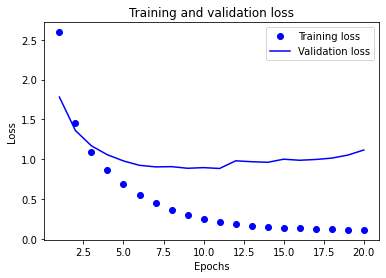

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

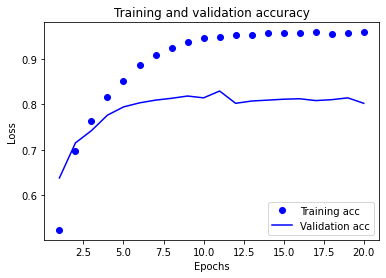

In [13]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 25ms/step - loss: 2.6796 - accuracy: 0.5179 - val_loss: 1.7940 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.4569 - accuracy: 0.7045 - val_loss: 1.3387 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.0809 - accuracy: 0.7661 - val_loss: 1.1450 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8451 - accuracy: 0.8210 - val_loss: 1.0314 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6637 - accuracy: 0.8613 - val_loss: 0.9660 - val_accuracy: 0.7910
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5319 - accuracy: 0.8889 - val_loss: 0.9064 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.4284 - accuracy: 0.9100 - val_loss: 0.8793 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

In [15]:
results

[0.9892918467521667, 0.7871772050857544]

In [16]:
predictions = model.predict(x_test)

In [17]:
predictions = model.predict(x_test)

In [18]:
predictions[0].shape

(46,)

In [19]:
np.sum(predictions[0])

0.99999994

In [20]:
np.argmax(predictions[0])

3

In [21]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [22]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [25]:
#Smaller Batch Size with More Epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=100,
          batch_size=32,
          validation_data=(x_val, y_val))

Epoch 1/100
250/250 [==============================] - 2s 6ms/step - loss: 1.9840 - accuracy: 0.5406 - val_loss: 1.5267 - val_accuracy: 0.6240
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 1.3293 - accuracy: 0.6594 - val_loss: 1.3745 - val_accuracy: 0.6490
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 1.1362 - accuracy: 0.6908 - val_loss: 1.3454 - val_accuracy: 0.6570
Epoch 4/100
250/250 [==============================] - 1s 6ms/step - loss: 1.0071 - accuracy: 0.7234 - val_loss: 1.3538 - val_accuracy: 0.6900
Epoch 5/100
250/250 [==============================] - 2s 6ms/step - loss: 0.9008 - accuracy: 0.7751 - val_loss: 1.4225 - val_accuracy: 0.7130
Epoch 6/100
250/250 [==============================] - 1s 6ms/step - loss: 0.8175 - accuracy: 0.8017 - val_loss: 1.4373 - val_accuracy: 0.7080
Epoch 7/100
250/250 [==============================] - 1s 6ms/step - loss: 0.7509 - accuracy: 0.8109 - val_loss: 1.5469 - val_accuracy: 0.7110

Epoch 58/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3746 - accuracy: 0.8946 - val_loss: 7.1768 - val_accuracy: 0.6620
Epoch 59/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3707 - accuracy: 0.8941 - val_loss: 7.2935 - val_accuracy: 0.6510
Epoch 60/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3686 - accuracy: 0.8948 - val_loss: 7.4774 - val_accuracy: 0.6610
Epoch 61/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3706 - accuracy: 0.8943 - val_loss: 8.1381 - val_accuracy: 0.6590
Epoch 62/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3747 - accuracy: 0.8945 - val_loss: 7.4917 - val_accuracy: 0.6510
Epoch 63/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3670 - accuracy: 0.8945 - val_loss: 7.9591 - val_accuracy: 0.6660
Epoch 64/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3704 - accuracy: 0.8943 - val_loss: 7.7905 - val_accuracy:

In [24]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 1ms/step - loss: 2.1223 - accuracy: 0.6692
